> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Analysis TMDB-Project (The Movie Database)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> My analysis will be on TMDb movies dataset.

> This dataset is about 10,000 movies were collected from TMDb (The Movie Database), it consists of 21 columns like (imdb_id, revenue, budget, vote_count etc).

> **Question that can analyised from this data set**
> 1. What properties are associated with highly rated movies?


In [23]:
# Here we'll import important libraries that we'll use.
import pandas as pd
import numpy as np
import csv
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> Ok, We saw a preface of the dataset and what does consist of, then we asked some question that we would answer them, and we imported useful libraries, so we'll go to load data and take a look to see if there is any problem that can deal with.
> So we're going to Assess, clean, and preparing the data.

### General Properties

In [24]:
# Load the data
df = pd.read_csv('tmdb-movies.csv')
# Take a loot at it.
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10865 non-null  int64  
 1   popularity            10865 non-null  float64
 2   original_title        10865 non-null  object 
 3   cast                  10789 non-null  object 
 4   director              10821 non-null  object 
 5   runtime               10865 non-null  int64  
 6   genres                10842 non-null  object 
 7   production_companies  9835 non-null   object 
 8   vote_count            10865 non-null  int64  
 9   vote_average          10865 non-null  float64
 10  release_year          10865 non-null  int64  
 11  budget                10865 non-null  float64
 12  revenue               10865 non-null  float64
dtypes: float64(4), int64(4), object(5)
memory usage: 1.2+ MB


In [25]:
# Check for NaN values.
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

\>\> *From above, we can see there are a lot of NaN values that we should deal with them.*


### Data Cleaning (Replace this with more specific notes!)

In [26]:
# Check for duplicates.
print(df.shape)
df.duplicated().sum()

(10866, 21)


1

In [27]:
#remove one duplicated row
df.drop_duplicates(inplace = True)
#check to see if row removed
df.shape

(10865, 21)

In [28]:
#remove unnecessary columns
df.drop(['imdb_id','homepage','budget','revenue','tagline','overview','release_date','keywords'], axis=1, inplace=True)

\>\> *Here, I removed any unnecessary columns that provide little to no quantifiable value so that the table only contains information pertinent to my analysis.*

**imdb_id**: This value is not necessary in analyzing information within the table.

**homepage, tagline, overview, keywords**: These values are unique to each row and cannot be used to make comparisons across multiple rows.

**budget, revenue**: Since the 'budget_adj' and 'revenue_adj' columns adjust the budget and revenue values in terms of 2010 dollars and will therefore allow for more accurate comparisons and analysis, these columns are not needed.

**release_date**: I will be using release year to analyze this data, so this more specific column is not needed.

In [32]:
#rename columns for better readability
df.rename(columns = {'budget_adj':'budget', 'revenue_adj':'revenue'}, inplace=True)
# We renamed two columns above to make them more readable.
df.info()
df.head(3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10865 non-null  int64  
 1   popularity            10865 non-null  float64
 2   original_title        10865 non-null  object 
 3   cast                  10789 non-null  object 
 4   director              10821 non-null  object 
 5   runtime               10865 non-null  int64  
 6   genres                10842 non-null  object 
 7   production_companies  9835 non-null   object 
 8   vote_count            10865 non-null  int64  
 9   vote_average          10865 non-null  float64
 10  release_year          10865 non-null  int64  
 11  budget                10865 non-null  float64
 12  revenue               10865 non-null  float64
dtypes: float64(4), int64(4), object(5)
memory usage: 1.2+ MB


,id,popularity,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget,revenue
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,1.012000e+08,2.716190e+08


In [33]:
#remove rows with null values
df.dropna(inplace = True)
df.isnull().sum()
df.shape

(9772, 13)

*After dropping rows with null values, rows become 9772 rows from 10866 rows*

*Here, we're going to deal with genres column and make it much easier to work with*

In [34]:
#turn string into list
df['genres'] = df['genres'].str.split('|')
df.head(3)

,id,popularity,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget,revenue
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,"[Action, Adventure, Science Fiction, Thriller]",Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,"[Action, Adventure, Science Fiction, Thriller]",Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,"[Adventure, Science Fiction, Thriller]",Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,1.012000e+08,2.716190e+08


In [35]:
#create new table with genres listed out by row
df_gen = df.genres.apply(pd.Series)
df_gen.head(3)

,0,1,2,3,4
0,Action,Adventure,Science Fiction,Thriller,NaN
1,Action,Adventure,Science Fiction,Thriller,NaN
2,Adventure,Science Fiction,Thriller,NaN,NaN


In [36]:
#merge both tables
df_gen=df.merge(df_gen, left_index=True, right_index = True)
df_gen.head(3)

,id,popularity,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget,revenue,0,1,2,3,4
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,"[Action, Adventure, Science Fiction, Thriller]",Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,Action,Adventure,Science Fiction,Thriller,NaN
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,"[Action, Adventure, Science Fiction, Thriller]",Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08,Action,Adventure,Science Fiction,Thriller,NaN
2,262500,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,"[Adventure, Science Fiction, Thriller]",Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,1.012000e+08,2.716190e+08,Adventure,Science Fiction,Thriller,NaN,NaN


*'Genres' column was a string seperated by '|', therefore it's difficult to work with, i turned it into a list then split items into thier own column in a new table, hen I merged this table with the original table.*

In [37]:
#pivot genres from columns into rows
df_gen=df_gen.melt(id_vars=['id','popularity','original_title','cast','director','runtime','genres','production_companies','vote_count','vote_average','release_year','budget','revenue'],value_name="genre")
df_gen.head(3)

,id,popularity,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget,revenue,variable,genre
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,"[Action, Adventure, Science Fiction, Thriller]",Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,0,Action
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,"[Action, Adventure, Science Fiction, Thriller]",Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08,0,Action
2,262500,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,"[Adventure, Science Fiction, Thriller]",Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,1.012000e+08,2.716190e+08,0,Adventure


In [38]:
#remove unnecessary columns
df_gen.drop(['genres','variable'],axis=1,inplace=True)
df_gen.head(1)

,id,popularity,original_title,cast,director,runtime,production_companies,vote_count,vote_average,release_year,budget,revenue,genre
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,Action


In [39]:
#remove rows with null values
df_gen.dropna(inplace=True)
df_gen.shape

(24650, 13)

*Lastly, I dropped all rows with null values again. I now have two tables, df and df_gen. The first table is the original table of 9,772 rows and the second is the new table where each movie is presented in a row for every genre it is associated with*

<a id='eda'></a>
## Exploratory Data Analysis

> In this step, I will explore the data to answer the below question and plot different visualizations to identify patterns and dependencies. 



### What properties are associated with highly rated movies?

*There are two rows that can be used to understand the favorability of a movie, 'popularity' and 'vote_average'. I compare these columns with each other to identify which one will be more helpful in answering my question.*




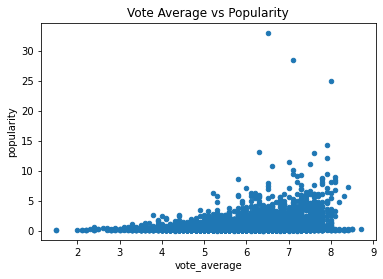

In [40]:
df.plot(x='vote_average',y='popularity',kind='scatter')
plt.title('Vote Average vs Popularity')
plt.show()

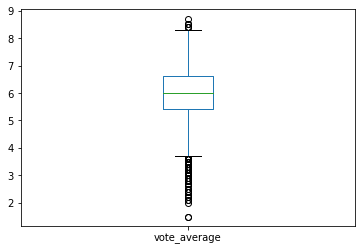

In [42]:
df['vote_average'].plot(kind='box')
plt.show()

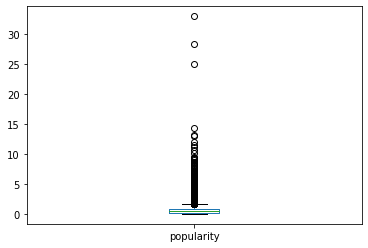

In [43]:
df['popularity'].plot(kind='box')
plt.show()

*I want to first check to make sure that both 'popularity' and 'vote_average' represent the same thing. The scatter plot above illustrates that both columns are positively correlated. However, as shown by the box plots, 'vote_average' is more evenly distributed and lacks any outliers. Therefore, all following analysis will be done with 'vote_average'.*

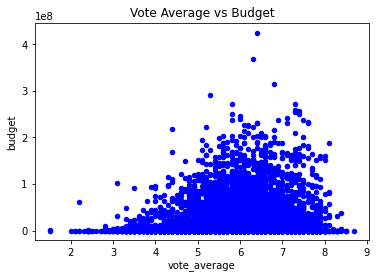

In [44]:
df.plot(x='vote_average',y='budget',kind='scatter', color = 'blue')
plt.title('Vote Average vs Budget')
plt.show()

*This scatter plot illustrates a positive correlation, which means that movies with higher budgets tend be more highly voted by viewers.*

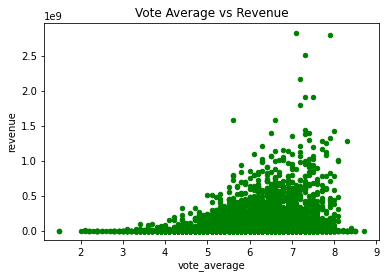

In [45]:
df.plot(x='vote_average',y='revenue',kind='scatter', color = 'green')
plt.title('Vote Average vs Revenue')
plt.show()

*The above plot also indicates a positive correlation between revenue and vote average. This means that movies that are more highly rated by viewers tend to make more in revenue.*

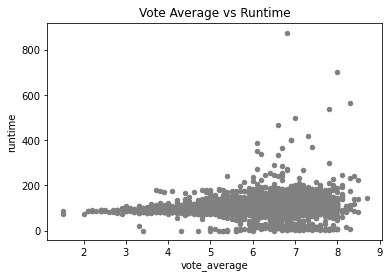

In [46]:
df.plot(x='vote_average',y='runtime',kind='scatter', color = 'gray')
plt.title('Vote Average vs Runtime')
plt.show()

*This scatter plot suggests a weaker relationship between vote average and runtime. Though it appears that the longest movies have a higher vote average, there doesn't seem to be a decisive pattern between the two variables in general.*



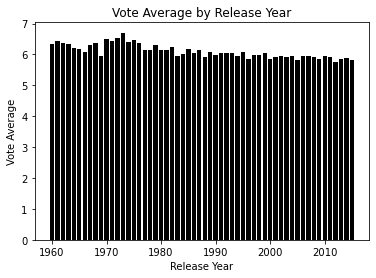

In [47]:
yearly_df = df.groupby('release_year').mean()
plt.bar(yearly_df.index,yearly_df['vote_average'], color = 'black')
plt.title('Vote Average by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Vote Average')
plt.show()

*To create the above chart, I made a new dataframe that grouped the movies by release year. Then I plotted the vote average by release year on a bar chart.*

*In this bar chart, there seems to be a slight downward slope in vote average over time. Though there isn't necessarily a clear trend, it is safe to say that the most highly voted movies on TMDb were released between 1960 and 1980.*

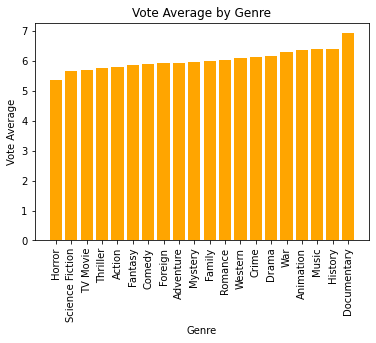

In [48]:
df_gen_gen=df_gen.groupby('genre').mean()
df_gen_gen=df_gen_gen.sort_values('vote_average')
df_gen_gen
plt.bar(df_gen_gen.index,df_gen_gen['vote_average'], color = 'orange')
plt.xticks(rotation='90')
plt.title('Vote Average by Genre')
plt.ylabel('Vote Average')
plt.xlabel('Genre')
plt.show()

*To compare vote averge by genre, I used the new table I made while cleaning the data (df_gen) to create another table that displays the mean value of all columns aggregated by genre type. Then I plotted the vote average mean on a bar chart for each genre.*

*The chart shows that the lowest rated movies are horror, sci-fi, and TV movie, while the highest rated are documentary, history, and music.*

<a id='conclusions'></a>
## Conclusions

*There are many qualities about movies that make them unique from one another. In this project, I was able to analyze these qualities and identify which properties are associated with movie popularity.*

*After cleaning and trimming the dataset by removing unnecessary, null, and duplicated values, I created a secondary table that broke each movie down into the separate genres it falls under.*

*Then I plotted a few charts to assess what will be used as the dependent variable, popularity or vote average. Because vote average was more evenly distributed, I used this as the variable that indicates favorability among viewers.*

*Next, I plotted various other variables against vote average and found that movies with higher vote averages tend to have higher budgets and higher revenue. I also found that movies released between 1960-1980, documentaries, history movies, and music movies tend to be voted higher than others.*

*Since my analysis only illustrates correlation between variables, it does not definitively conclude whether any trait can predict the vote average of a movie. That would require deeper statistical analysis that was not performed in this project.*